In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [34]:
import os

def get_filenames(folder_path):
    filenames = []
    for filename in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, filename)):
            filenames.append(filename)
    return filenames

# 使用示例
folder_path = 'simu_data/'  # 替换成你的文件夹路径
file_list = get_filenames(folder_path)

file_list.sort()
file_list


['20240102003855.txt',
 '20240102133855.txt',
 '20240102140017.txt',
 '20240102180106.txt',
 '20240103131121.txt',
 '20240103184624.txt',
 '20240104122441.txt',
 '20240104124534.txt',
 '20240104190346.txt',
 '20240107150904.txt',
 '20240107175320.txt']

In [35]:
import pandas as pd
import os

def read_files_to_dataframes(folder_path):
    dataframes = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            # 读取CSV文件
            df = pd.read_csv(file_path, sep='\t')
            data = pd.DataFrame()
            data[['acc_X(g)', 'acc_Y(g)', 'acc_Z(g)', 'Time']] = df[['加速度X(g)', '加速度Y(g)', '加速度Z(g)', '时间']]
            data['Time'] = pd.to_datetime(data['Time'], format='%Y-%m-%d %H:%M:%S:%f')
            # 将DataFrame存储在以文件名为键的字典中
            dataframes[filename] = data
    return dataframes

# 使用示例
folder_path = 'simu_data'  # 替换成你的文件夹路径
dfs = read_files_to_dataframes(folder_path)

# 打印每个DataFrame的信息（可选）
for filename, df in dfs.items():
    filename = filename[0:12]
    print(f"Data from {filename}:")
    print(df.head())  # 打印每个DataFrame的前几行


Data from 202401021400:
   acc_X(g)  acc_Y(g)  acc_Z(g)                    Time
0     0.247    -0.080     0.959 2024-01-02 14:00:17.967
1     0.247    -0.092     0.951 2024-01-02 14:00:17.967
2     0.240    -0.092     0.951 2024-01-02 14:00:18.890
3     0.240    -0.089     0.957 2024-01-02 14:00:18.890
4     0.233    -0.089     0.957 2024-01-02 14:00:18.154
Data from 202401041224:
   acc_X(g)  acc_Y(g)  acc_Z(g)                    Time
0    -0.005     0.001     0.998 2024-01-04 12:24:41.944
1    -0.005     0.002     0.996 2024-01-04 12:24:42.350
2    -0.006     0.002     0.997 2024-01-04 12:24:42.155
3    -0.006     0.001     0.996 2024-01-04 12:24:42.212
4    -0.006     0.002     0.997 2024-01-04 12:24:42.338
Data from 202401031846:
   acc_X(g)  acc_Y(g)  acc_Z(g)                    Time
0    -0.013    -0.005     0.998 2024-01-03 18:46:24.575
1    -0.012    -0.005     0.997 2024-01-03 18:46:24.668
2    -0.012    -0.004     0.998 2024-01-03 18:46:24.788
3    -0.012    -0.005     0.998 

In [36]:
# 根据键排序
sorted_items = sorted(dfs.items())

# 创建一个新的有序字典
sorted_dfs = {k: v for k, v in sorted_items}

sorted_dfs.keys()

dict_keys(['20240102003855.txt', '20240102133855.txt', '20240102140017.txt', '20240102180106.txt', '20240103131121.txt', '20240103184624.txt', '20240104122441.txt', '20240104124534.txt', '20240104190346.txt', '20240107150904.txt', '20240107175320.txt'])

Plotting data from 202401020...
Plotting data from 202401020...
Plotting data from 202401020...
Plotting data from 202401020...


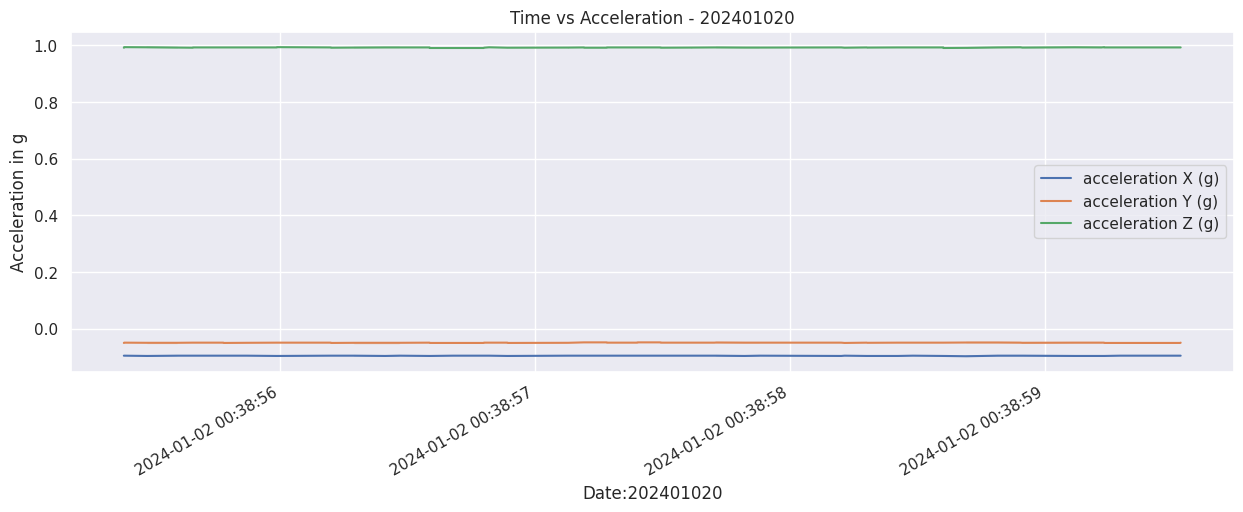

Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...


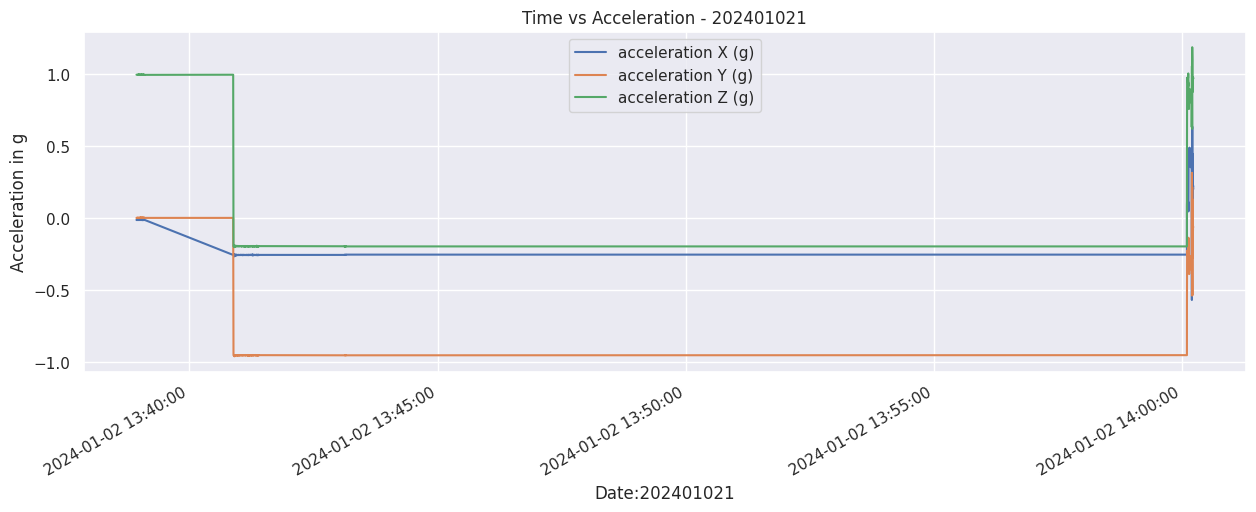

Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...


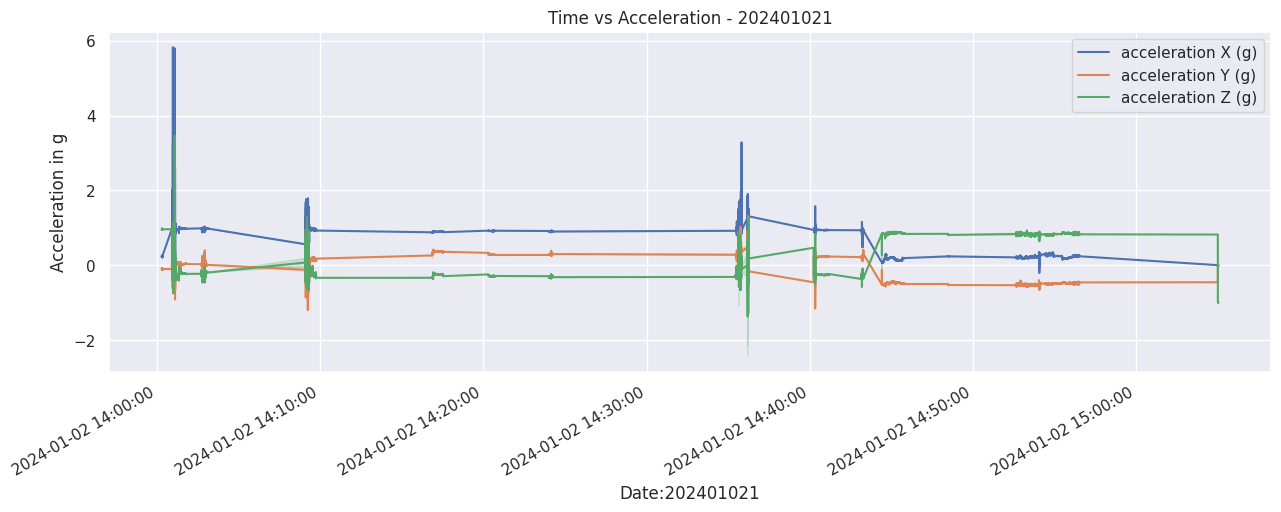

Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...


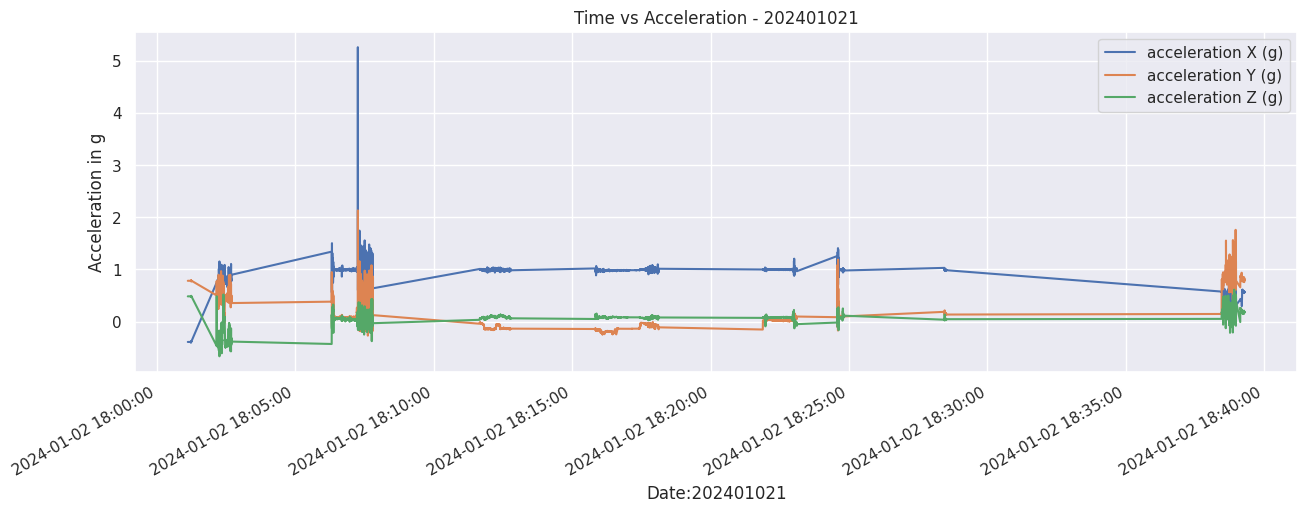

Plotting data from 202401031...
Plotting data from 202401031...
Plotting data from 202401031...
Plotting data from 202401031...


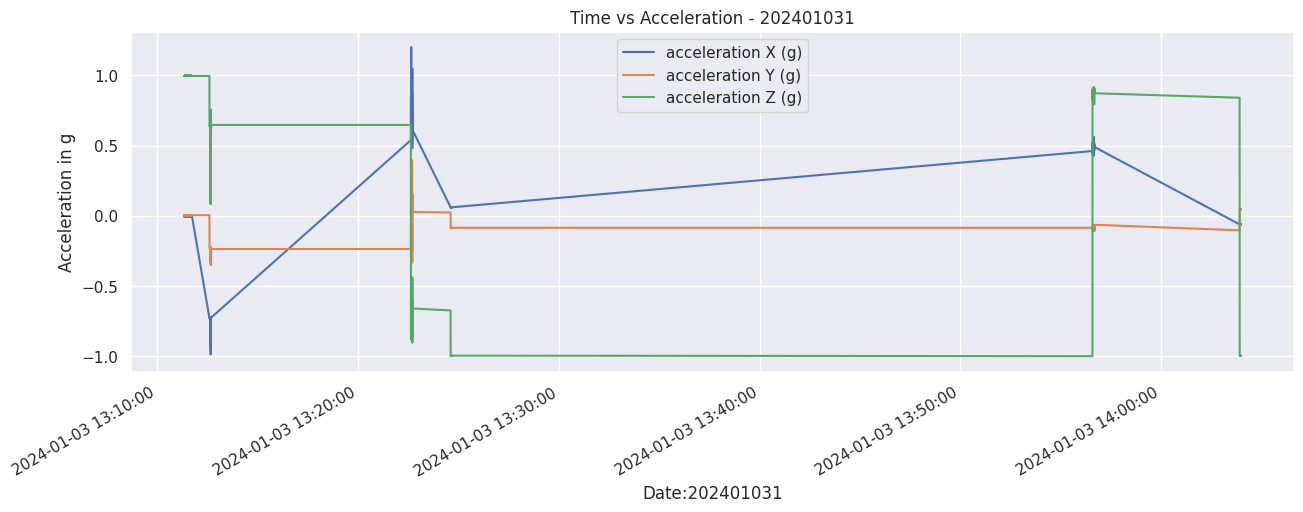

Plotting data from 202401031...
Plotting data from 202401031...
Plotting data from 202401031...
Plotting data from 202401031...


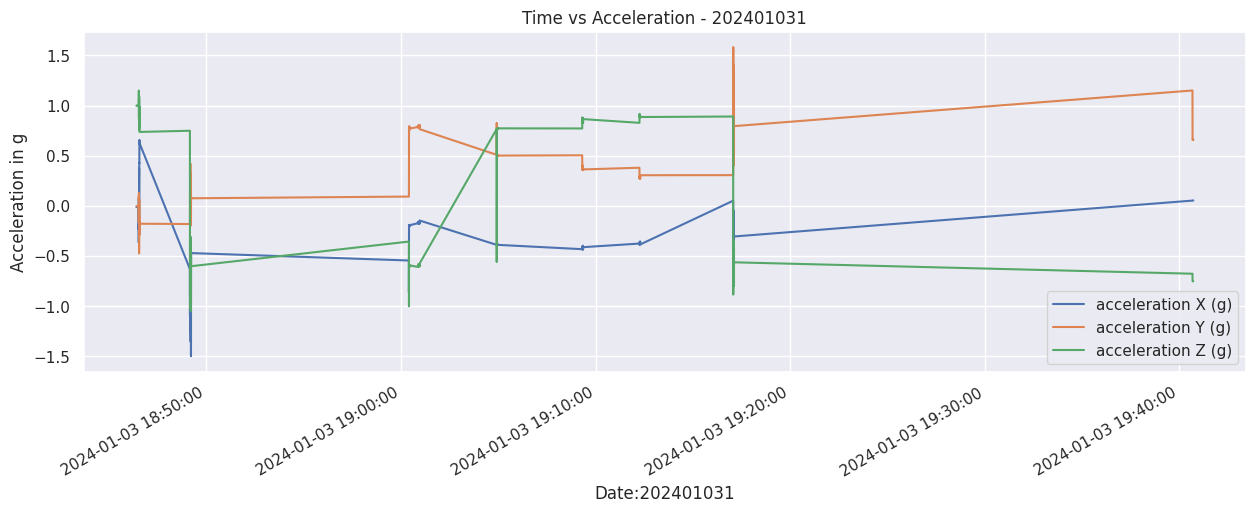

Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...


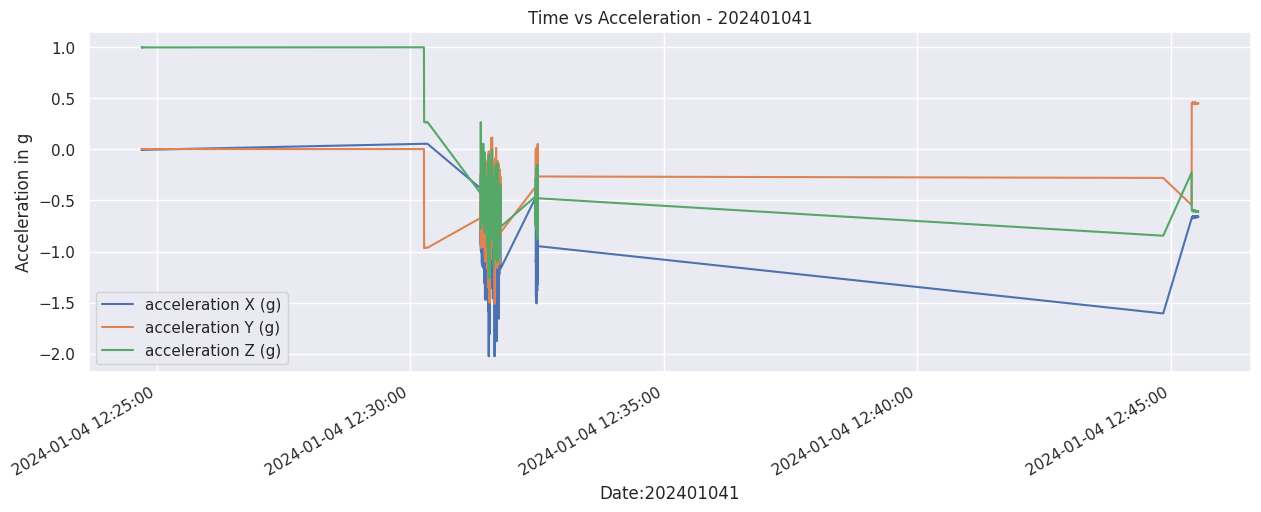

Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...


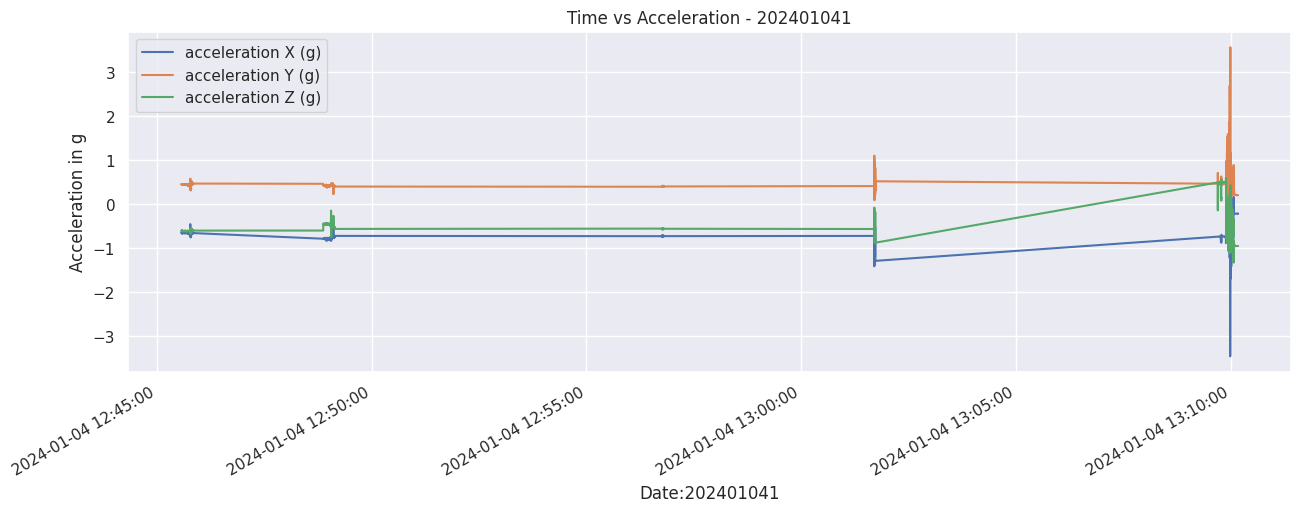

Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...


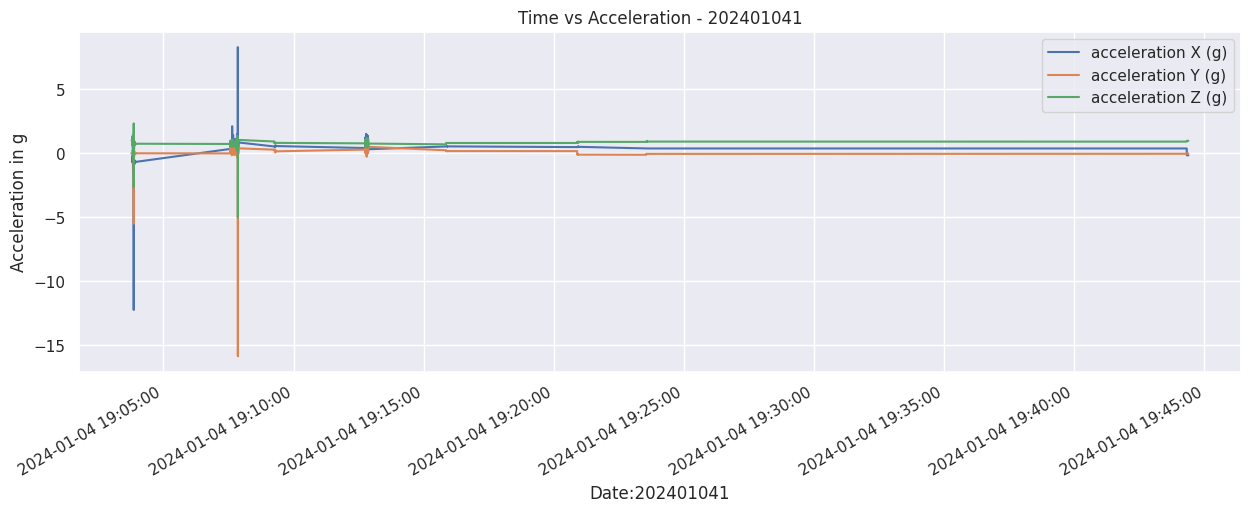

Plotting data from 202401071...
Plotting data from 202401071...
Plotting data from 202401071...
Plotting data from 202401071...


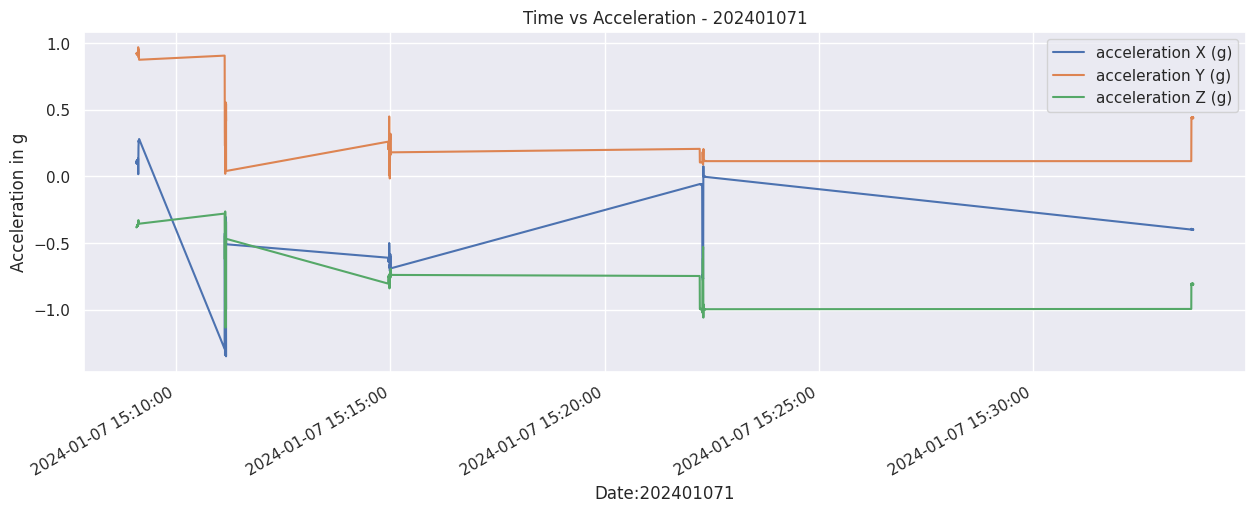

Plotting data from 202401071...
Plotting data from 202401071...
Plotting data from 202401071...
Plotting data from 202401071...


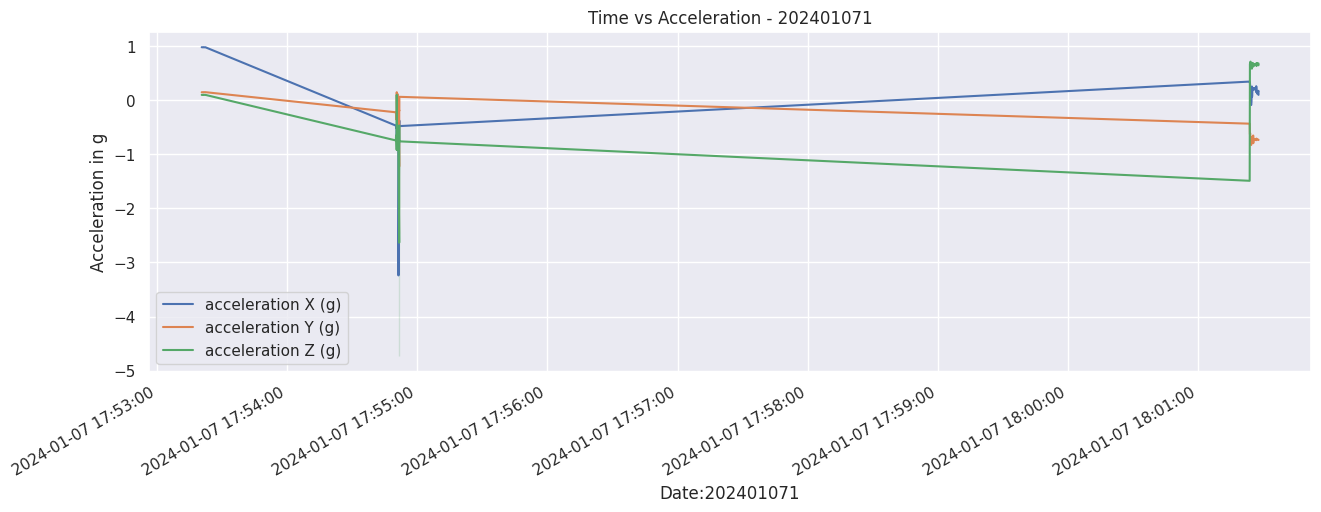

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 配置 Seaborn
sns.set_theme(style="darkgrid")

for filename, df in sorted_dfs.items():
    filename = filename[0:9]

    print(f"Plotting data from {filename}...")

    # 使用 Seaborn 重绘图表
    plt.figure(figsize=(15, 5))

    print(f"Plotting data from {filename}...")

    # 绘制每个加速度分量
    sns.lineplot(x='Time', y='acc_X(g)', data=df, label='acceleration X (g)')
    sns.lineplot(x='Time', y='acc_Y(g)', data=df, label='acceleration Y (g)')
    sns.lineplot(x='Time', y='acc_Z(g)', data=df, label='acceleration Z (g)')

    print(f"Plotting data from {filename}...")

    # 格式化图表
    plt.xlabel('Date:' + filename)
    plt.ylabel('Acceleration in g')
    plt.title(f'Time vs Acceleration - {filename}')
    plt.legend()
    plt.grid(True)

    print(f"Plotting data from {filename}...")

    # 改进日期格式化
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.show()


In [38]:
for filename, df in dfs.items():
    print(f"Data from {filename}:")
    print(df.shape)

Data from 20240102140017.txt:
(11934, 4)
Data from 20240104122441.txt:
(420, 4)
Data from 20240103184624.txt:
(353, 4)
Data from 20240103131121.txt:
(471, 4)
Data from 20240107150904.txt:
(206, 4)
Data from 20240102180106.txt:
(4640, 4)
Data from 20240102003855.txt:
(84, 4)
Data from 20240104124534.txt:
(1346, 4)
Data from 20240104190346.txt:
(505, 4)
Data from 20240107175320.txt:
(68, 4)
Data from 20240102133855.txt:
(581, 4)


In [41]:
# 使用pd.concat()合并所有DataFrame
combined_df = pd.concat(sorted_dfs.values(), ignore_index=True)

combined_df.shape

(20608, 4)

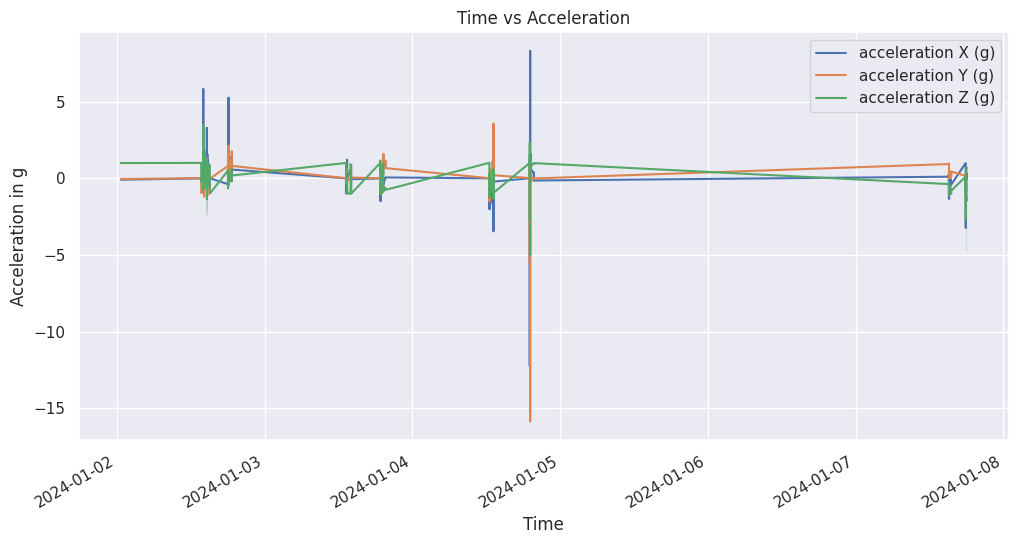

In [42]:

# Adjusting the datetime parsing to accommodate the specific format of the timestamps
# The format seems to be 'year-month-day hour:minute:second:millisecond'
combined_df['Time'] = pd.to_datetime(combined_df['Time'], format='%Y-%m-%d %H:%M:%S:%f')

# Re-plotting
plt.figure(figsize=(12, 6))

# Plotting each acceleration component
# 绘制每个加速度分量
sns.lineplot(x='Time', y='acc_X(g)', data=combined_df, label='acceleration X (g)')
sns.lineplot(x='Time', y='acc_Y(g)', data=combined_df, label='acceleration Y (g)')
sns.lineplot(x='Time', y='acc_Z(g)', data=combined_df, label='acceleration Z (g)')

# Formatting the plot
plt.xlabel('Time')
plt.ylabel('Acceleration in g')
plt.title('Time vs Acceleration')
plt.legend()
plt.grid(True)

# Improve date formatting on x-axis
plt.gcf().autofmt_xdate() # Auto format for better date representation
# myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
myFmt = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(myFmt)

# Show the plot
plt.show()


In [43]:
combined_df.to_csv('combined_test_data_2024_01_16.csv', index=False)